In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import RocCurveDisplay, confusion_matrix

sns.set(rc={'figure.figsize':(11,8)}) 
sns.set_style('whitegrid')

In [2]:
with open('../ProSPECCTs results/NMR_structures.pickle', 'rb') as f:
    dataset = pickle.load(f)

proc = []
for result in dataset:
    proc.append({
        'score': result.score,
        'label': result.label,
        'ligand_dist': result.ligand_dist
    })
df = pd.DataFrame.from_dict(proc) #, orient='index')
df

,score,label,ligand_dist
0,8641.369931,positive,1.794337e-07
1,739.532358,positive,8.026884e-02
2,109.347427,positive,1.036477e+00
3,89.626453,positive,1.113610e+00
4,82.533462,positive,1.079305e+00
...,...,...,...
108236,-1.000000,negative,NaN
108237,-1.000000,negative,NaN
108238,-1.000000,negative,NaN
108239,-1.000000,negative,NaN


In [3]:
print(f"Found correct: {df[(df.label == 'positive') & (df.ligand_dist < 1)].count()} out of {sum(df.label == 'positive')}")

Found correct: score          4360
label          4360
ligand_dist    4360
dtype: int64 out of 7729


In [4]:
print("Incorrect:", df[df.label == 'negative'].score.quantile(.9486))

Incorrect: -1.0


In [5]:
print("Median true ligand dist:", df[df.label == 'positive'].ligand_dist.median())

Median true ligand dist: 0.8154885768890381


<Axes: xlabel='score', ylabel='ligand_dist'>

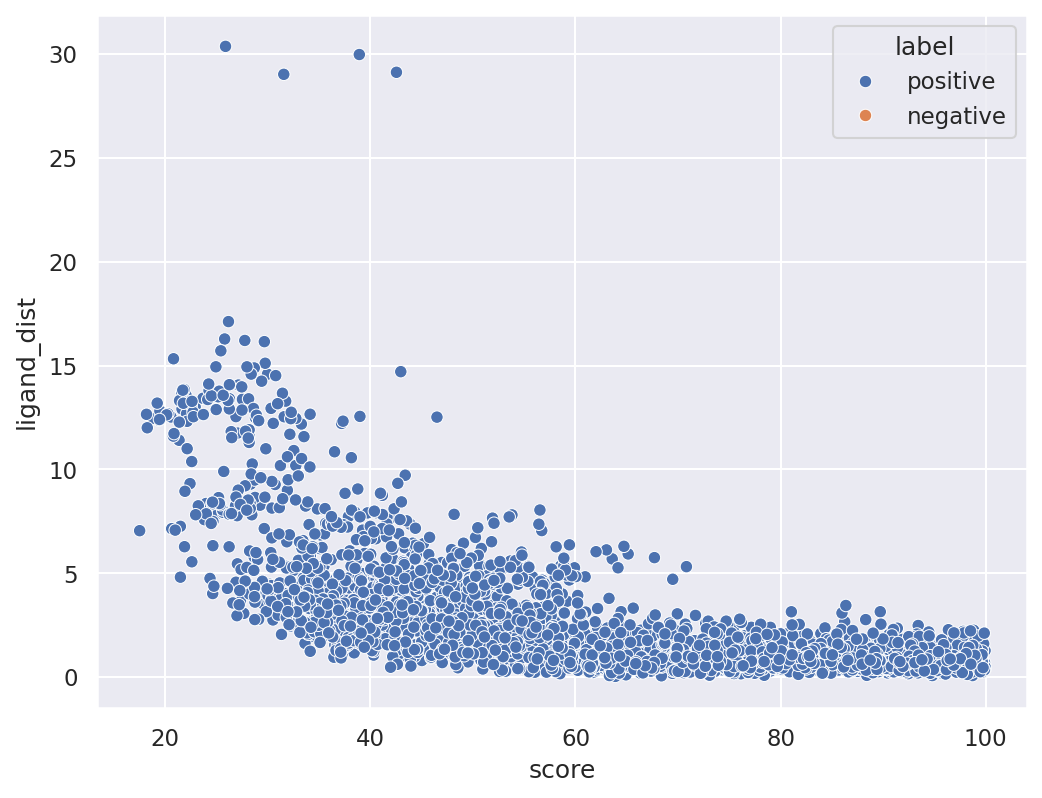

In [6]:
plt.figure(figsize=(8, 6), dpi=150)
sns.scatterplot(df[df.score < 100], x='score', y='ligand_dist', hue='label')

Text(0.5, 0, 'Distance of the Ligands After Superposition')

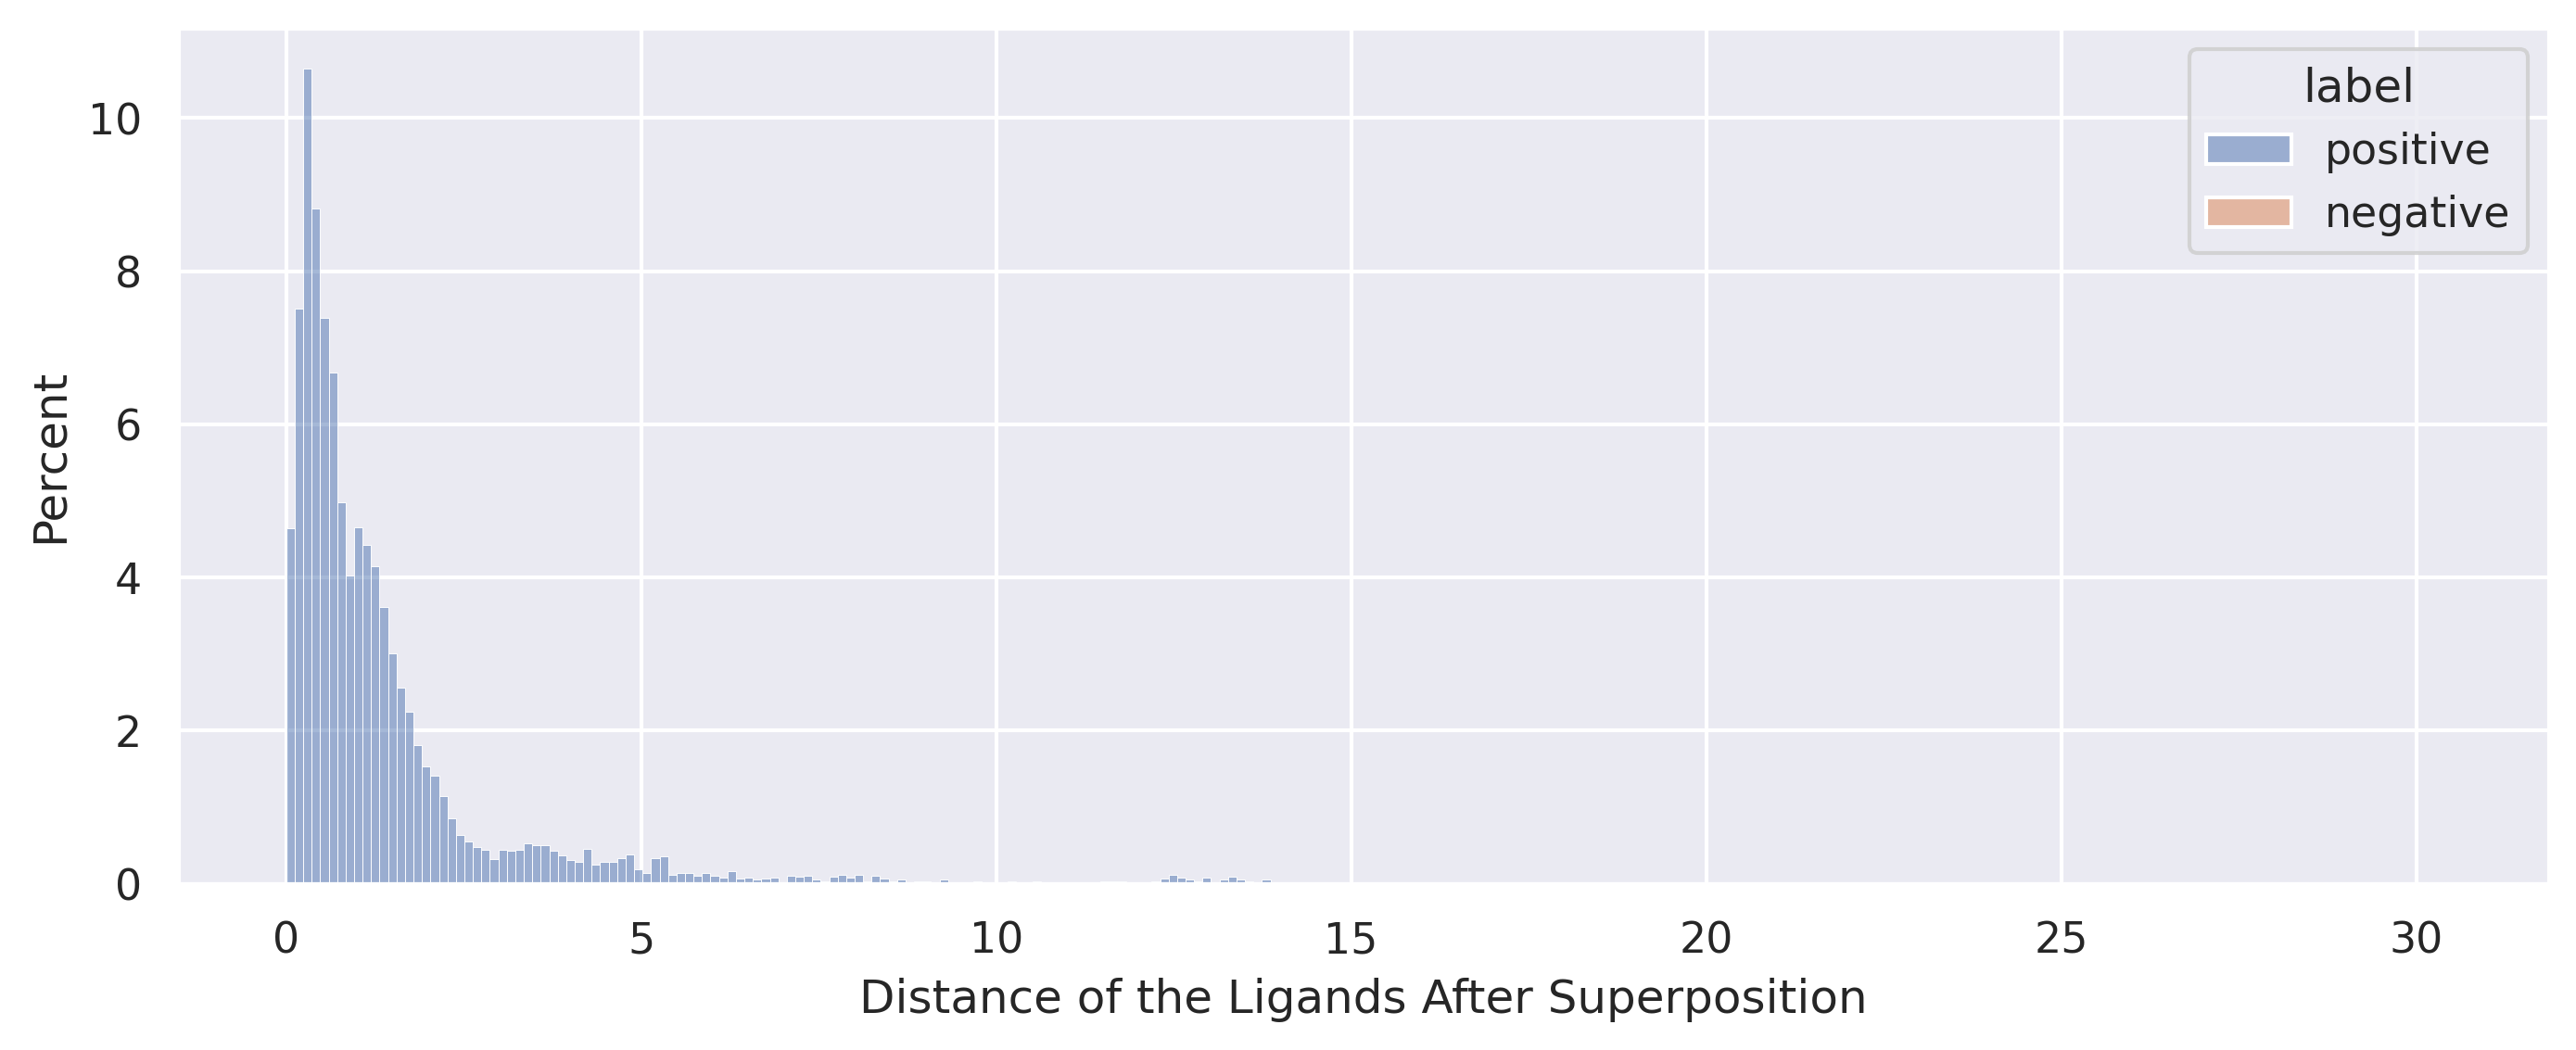

In [7]:
plt.figure(figsize=(11, 4), dpi=300)
sns.histplot(df, x='ligand_dist', hue='label', stat='percent', common_norm=False)
plt.xlabel('Distance of the Ligands After Superposition')

In [8]:
# sns.histplot(df, x='score', hue='label', stat='percent', common_norm=False)

<Axes: xlabel='score', ylabel='Percent'>

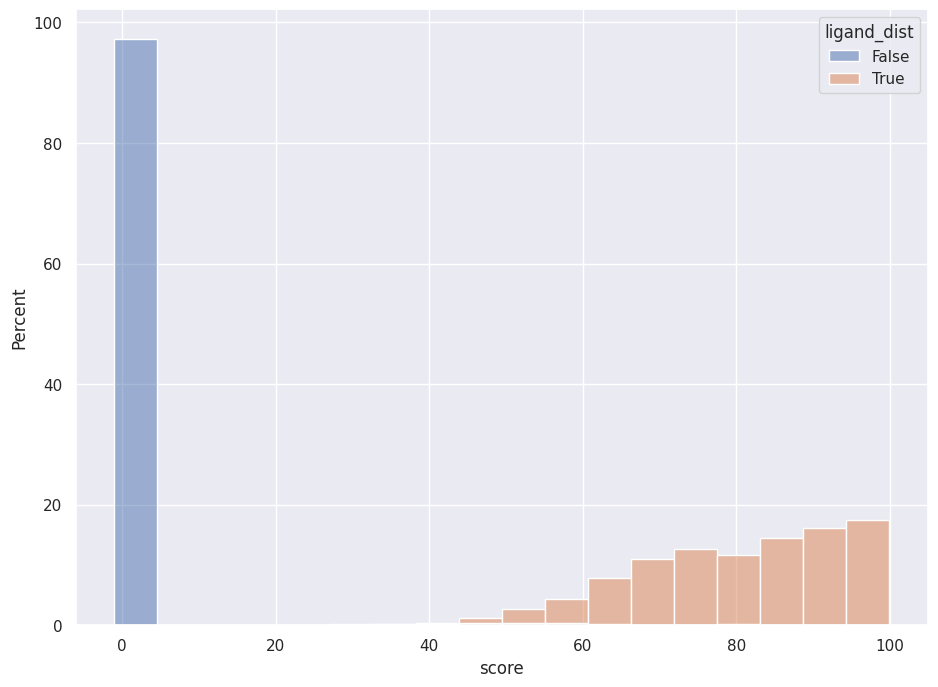

In [9]:
sns.histplot(df[df.score < 100], x='score', hue=df.ligand_dist < 1, stat='percent', common_norm=False)


Positive results: 7343


Text(0, 0.5, 'True Positive Rate')

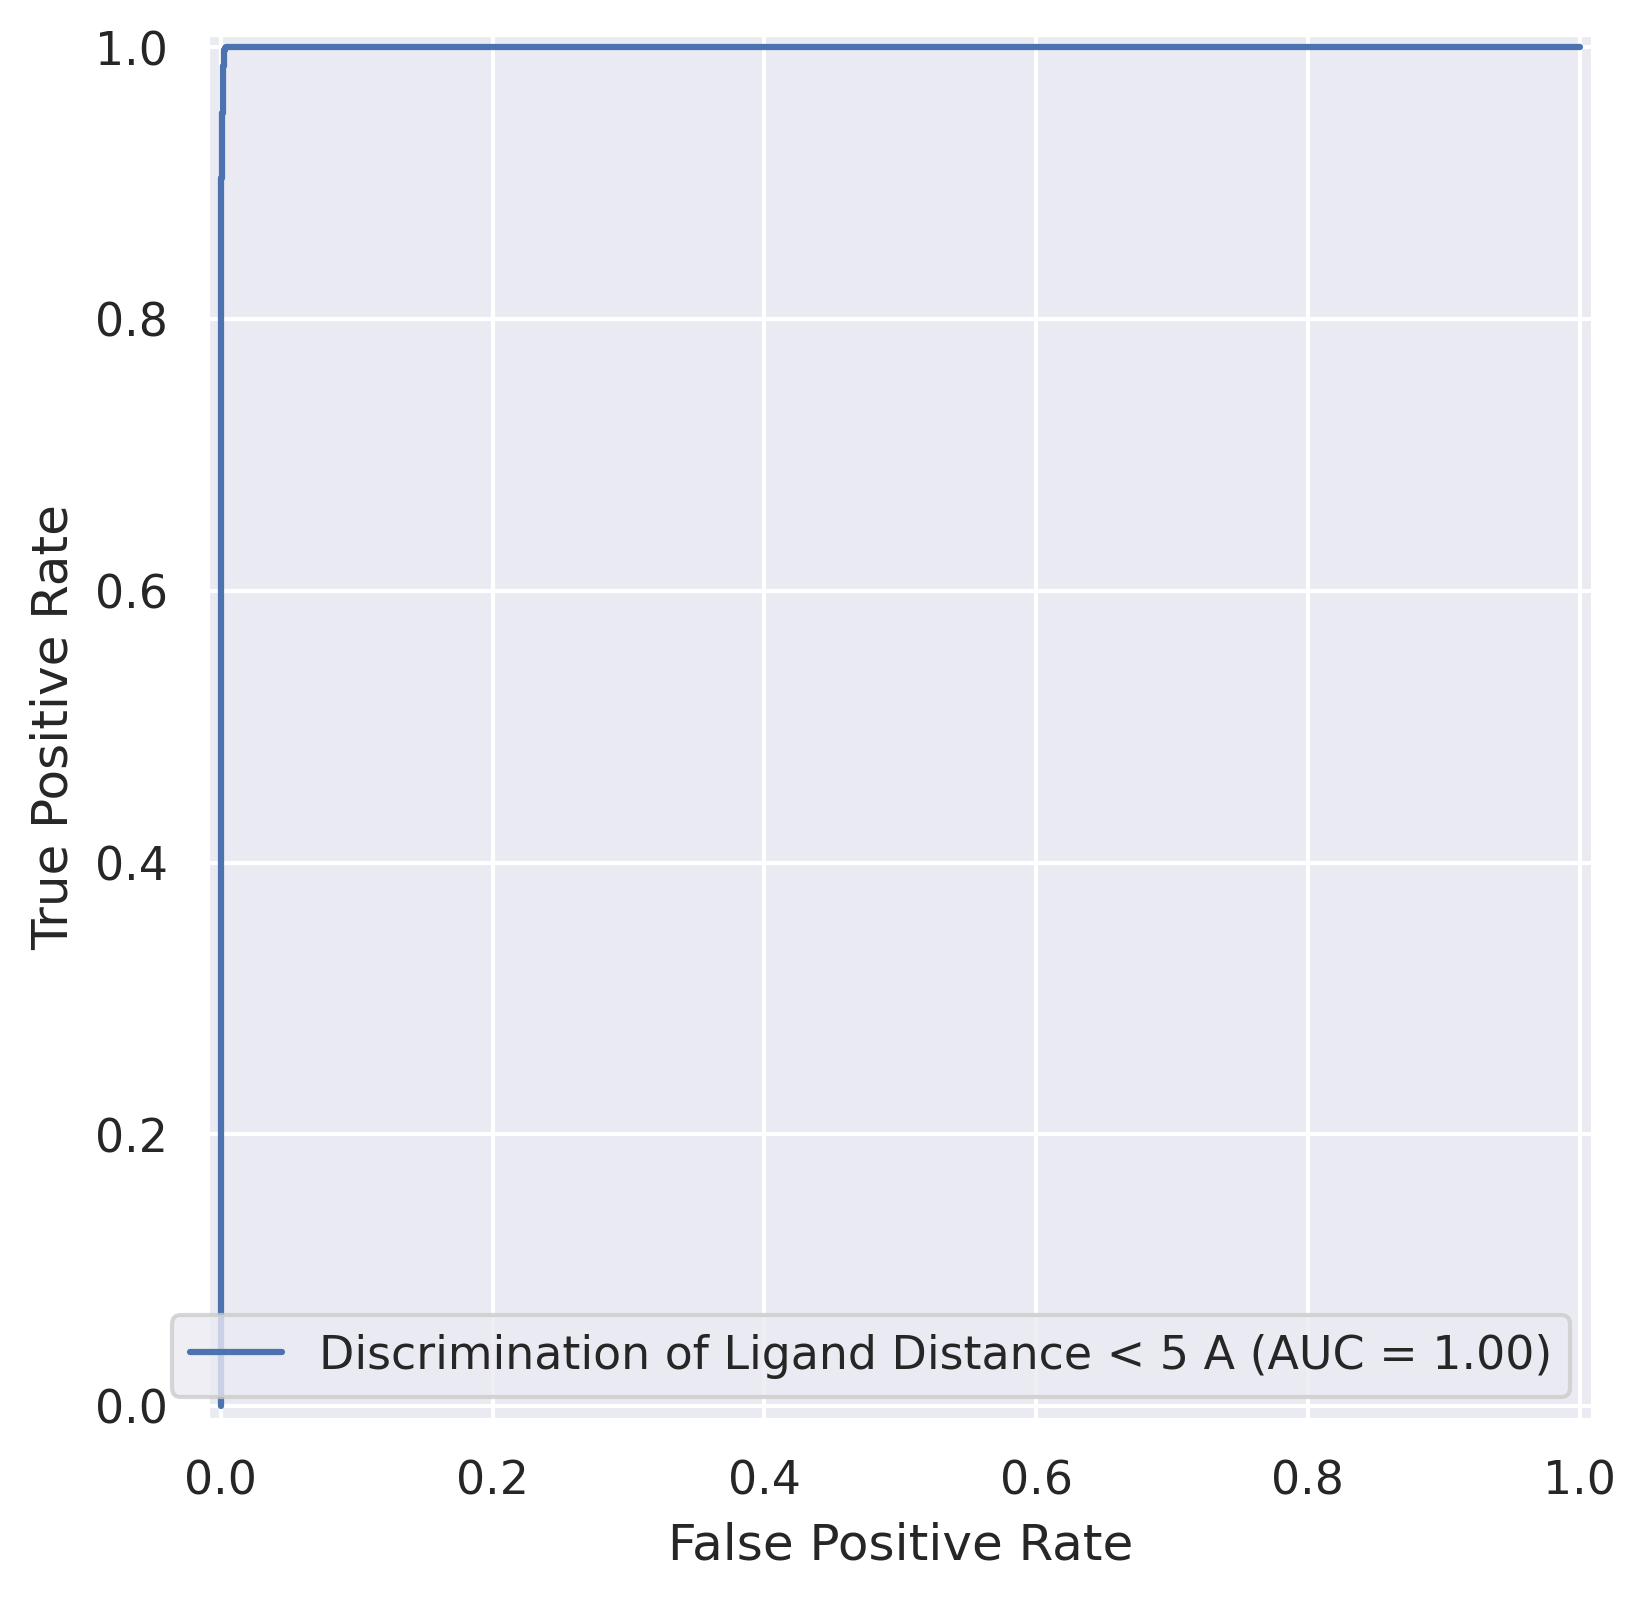

In [10]:
print("Positive results:", sum(df.ligand_dist < 5))
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
RocCurveDisplay.from_predictions(list(df.ligand_dist < 5), list(df.score), ax=ax, name="Discrimination of Ligand Distance < 5 A")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Total expected: 7729


Text(0, 0.5, 'True Positive Rate')

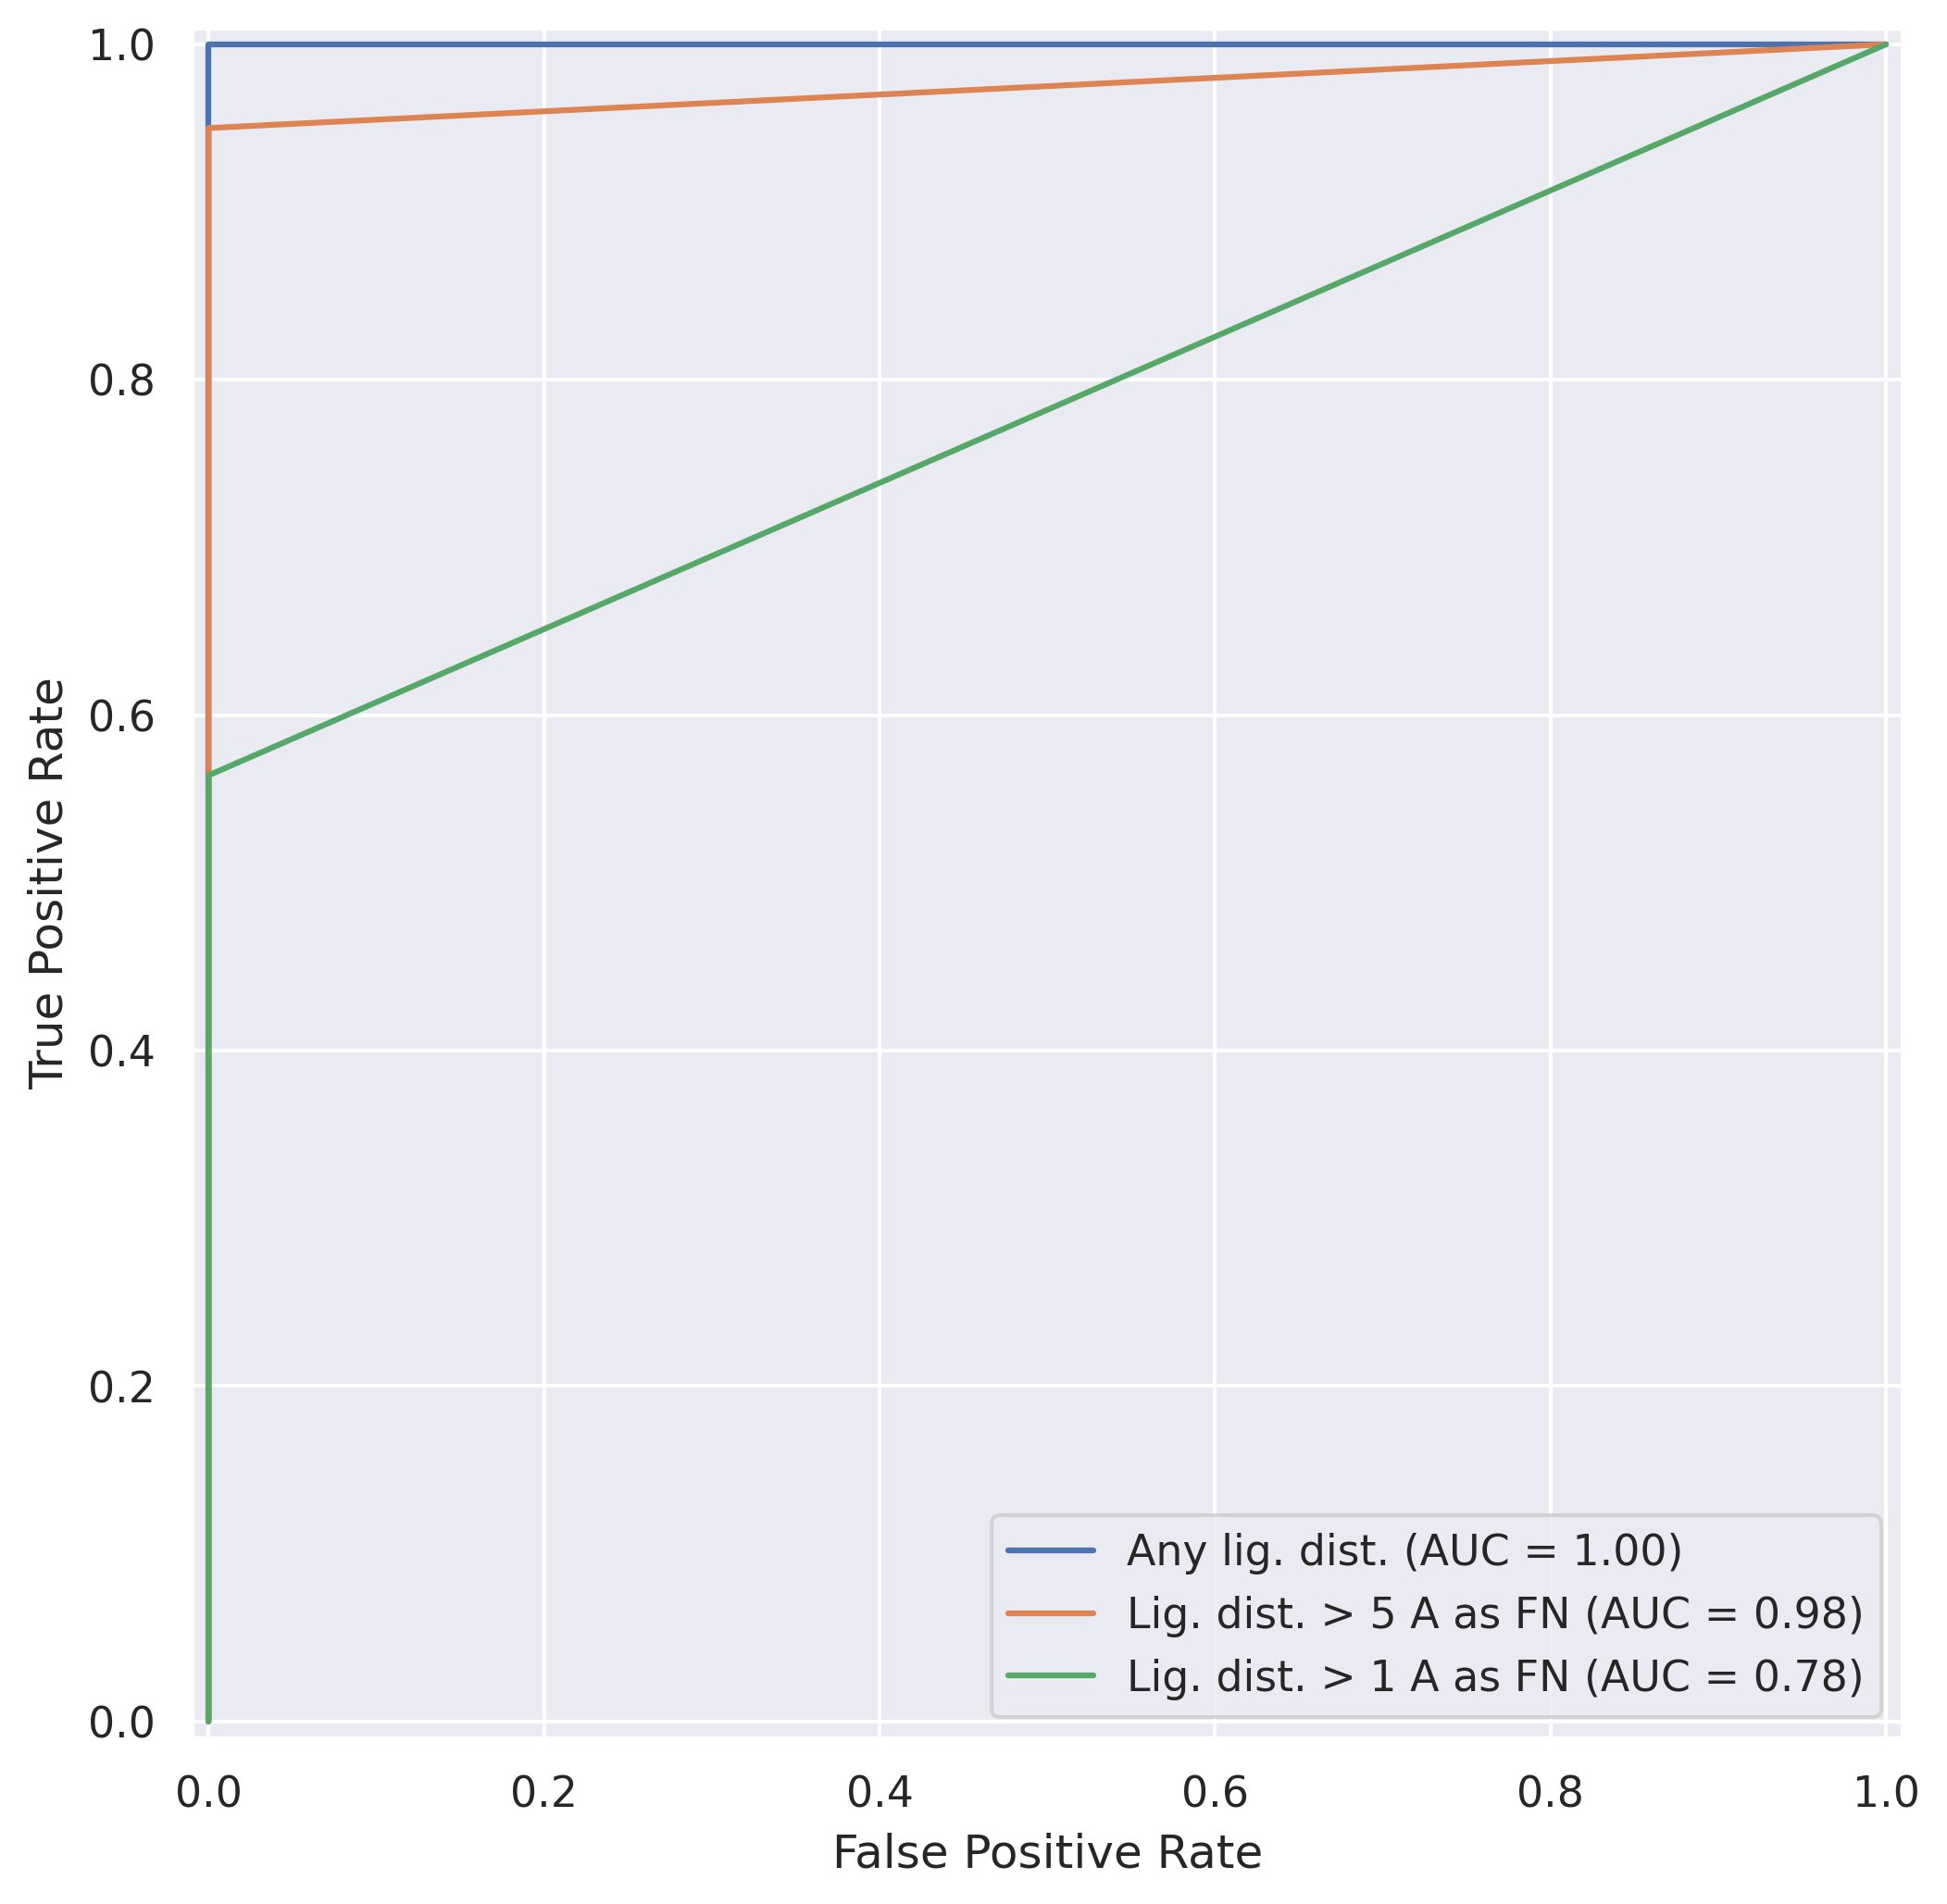

In [11]:
print('Total expected:', sum(df.label == 'positive'))
adjusted = [row.score if row.label == 'negative' or row.ligand_dist <= 99999 else -1 for i, row in df.iterrows()]
adjusted2 = [row.score if row.label == 'negative' or row.ligand_dist <= 5 else -1 for i, row in df.iterrows()]
adjusted1 = [row.score if row.label == 'negative' or row.ligand_dist <= 1 else -1 for i, row in df.iterrows()]
fig, ax = plt.subplots(figsize=(11,8), dpi=300)
RocCurveDisplay.from_predictions(df.label == 'positive', adjusted, plot_chance_level=False, name='Any lig. dist.', ax=ax)
RocCurveDisplay.from_predictions(df.label == 'positive', adjusted2, plot_chance_level=False, name='Lig. dist. > 5 A as FN', ax=ax)
RocCurveDisplay.from_predictions(df.label == 'positive', adjusted1, plot_chance_level=False, name='Lig. dist. > 1 A as FN',  ax=ax)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(48.74999999999997, 0.5, 'True')

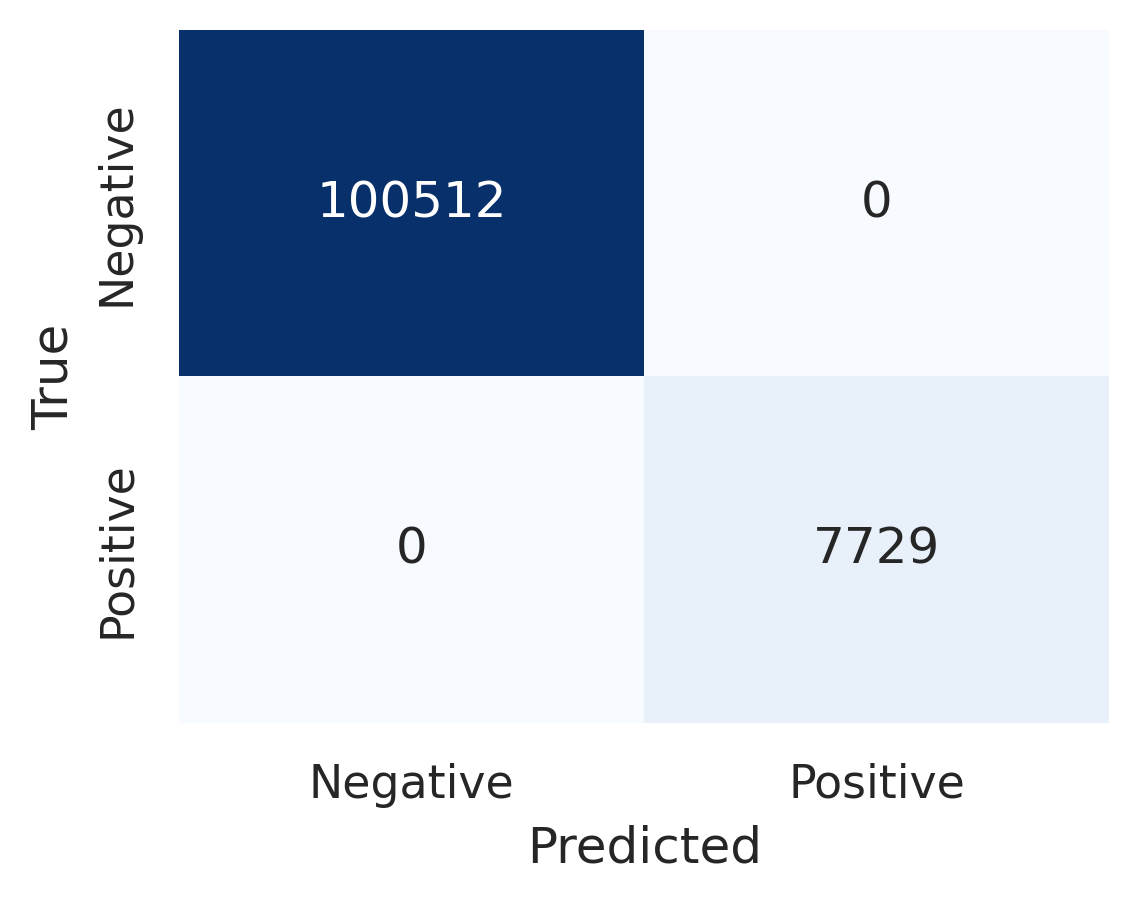

In [12]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
cm = confusion_matrix(df.label == 'positive', df.score > 0)
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], fmt='d', ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")